This notebook is based on the notebook format from the youtube series by Jonathan Soma "Introduction to geopandas"
The data within this notebook is from the City of Torontos Open Data set.

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#Tell matplot lib to generate plots inline, within the notebook
%matplotlib inline

In [21]:
#read shapefiles
shape_path = "/workspace/GIS_project/downloads/Toronto-shp/shape/"
roads = gpd.read_file(shape_path + "roads.shp")
#display head data
roads.head()

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
0,3695758,Highway 401 Collector,401,motorway,1,0,100.0,"LINESTRING (-79.35227 43.76645, -79.3472 43.76..."
1,3695759,Highway 401 Express,401,motorway,1,0,100.0,"LINESTRING (-79.35366 43.76662, -79.3494 43.76..."
2,3696081,Highway 401 Express,401,motorway,1,0,100.0,"LINESTRING (-79.31491 43.76844, -79.31595 43.7..."
3,3696082,Highway 401 Collector,401,motorway,1,0,100.0,"LINESTRING (-79.25869 43.78072, -79.25965 43.7..."
4,3696083,None,None,motorway_link,1,0,100.0,"LINESTRING (-79.33434 43.76752, -79.33357 43.7..."


<Axes: >

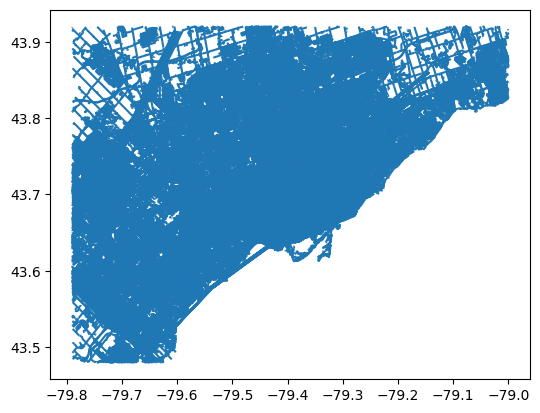

In [5]:
#plot the shapefiles
roads.plot()

In [12]:
#filter the data
#filter it to only motorways
roads_filtered = roads.query('type == "motorway"')
roads_filtered.head()

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
0,3695758,Highway 401 Collector,401,motorway,1,0,100.0,"LINESTRING (-79.35227 43.76645, -79.3472 43.76..."
1,3695759,Highway 401 Express,401,motorway,1,0,100.0,"LINESTRING (-79.35366 43.76662, -79.3494 43.76..."
2,3696081,Highway 401 Express,401,motorway,1,0,100.0,"LINESTRING (-79.31491 43.76844, -79.31595 43.7..."
3,3696082,Highway 401 Collector,401,motorway,1,0,100.0,"LINESTRING (-79.25869 43.78072, -79.25965 43.7..."
11,3696128,Don Valley Parkway,None,motorway,1,1,100.0,"LINESTRING (-79.33888 43.76826, -79.33881 43.7..."


<Axes: >

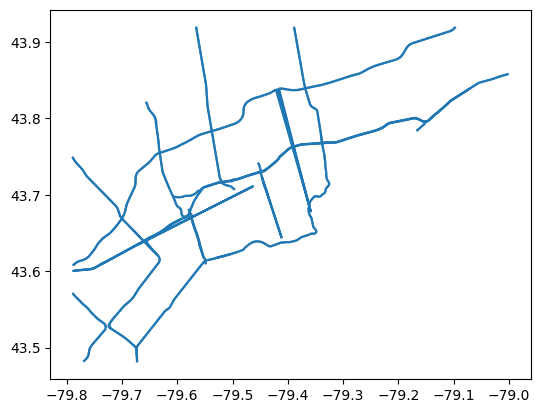

In [13]:
roads_filtered.plot()

<Axes: >

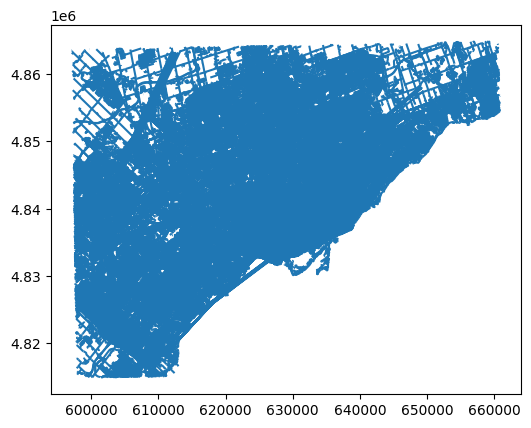

In [15]:
#changing projections of a plot
roads.to_crs(crs = 26917).plot()

(-79.829499685, -78.960500015, 43.458000335, 43.941997365)

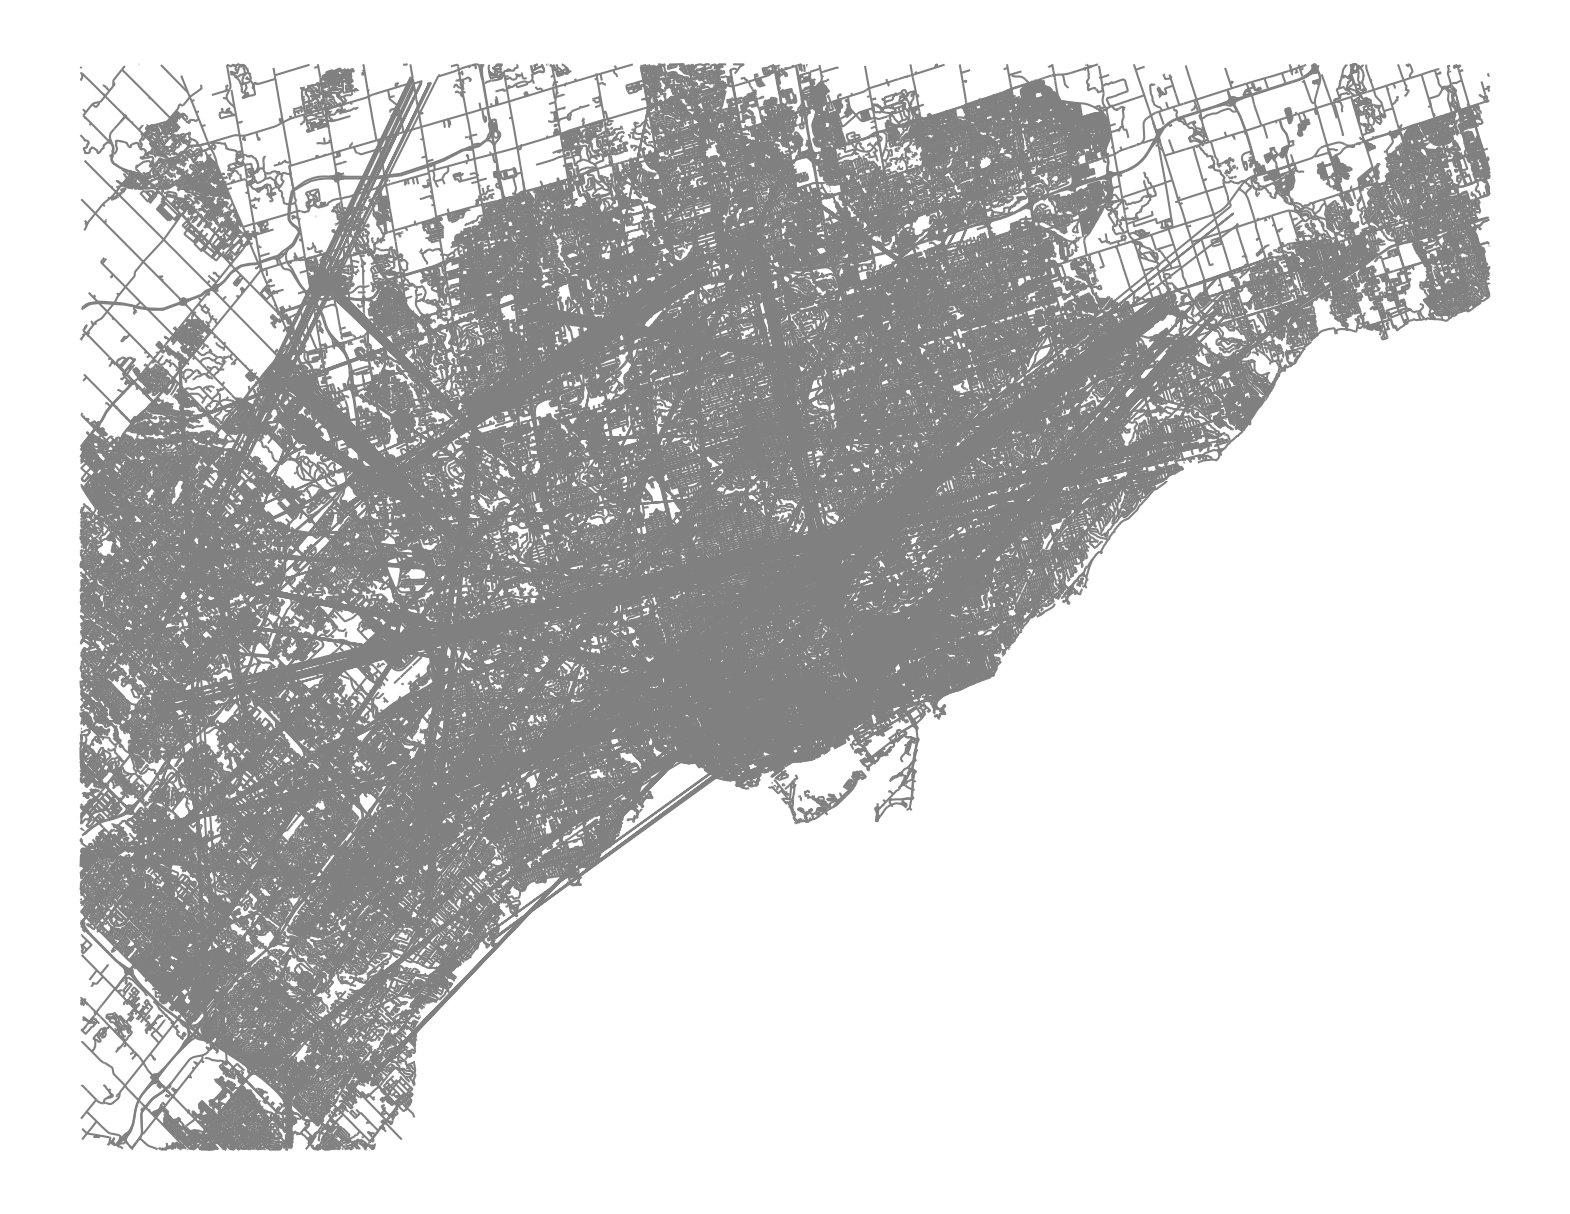

In [20]:
#change size of plot, change colours and remove axis
ax = roads.plot(figsize=(20,20), edgecolor='grey')
ax.axis('off')

In [33]:
#read new shapefile
toronto_points = gpd.read_file(shape_path+ "points.shp")
#what is the data?
toronto_points.head(20)

,osm_id,timestamp,name,type,geometry
0,1497793,None,None,motorway_junctio,POINT (-79.33469 43.75553)
1,1497897,None,None,traffic_signals,POINT (-79.33089 43.72669)
2,1497993,None,None,traffic_signals,POINT (-79.34694 43.75577)
3,1497996,None,None,traffic_signals,POINT (-79.34701 43.75864)
4,1498001,None,None,traffic_signals,POINT (-79.34711 43.76181)
5,1498018,None,None,traffic_signals,POINT (-79.34642 43.76957)
6,1498033,None,None,traffic_signals,POINT (-79.34698 43.77518)
7,1498042,None,None,traffic_signals,POINT (-79.34366 43.7759)
8,1498116,None,None,motorway_junctio,POINT (-79.33053 43.72553)
9,1498128,None,None,traffic_signals,POINT (-79.3414 43.75701)


(43.5, 43.9)

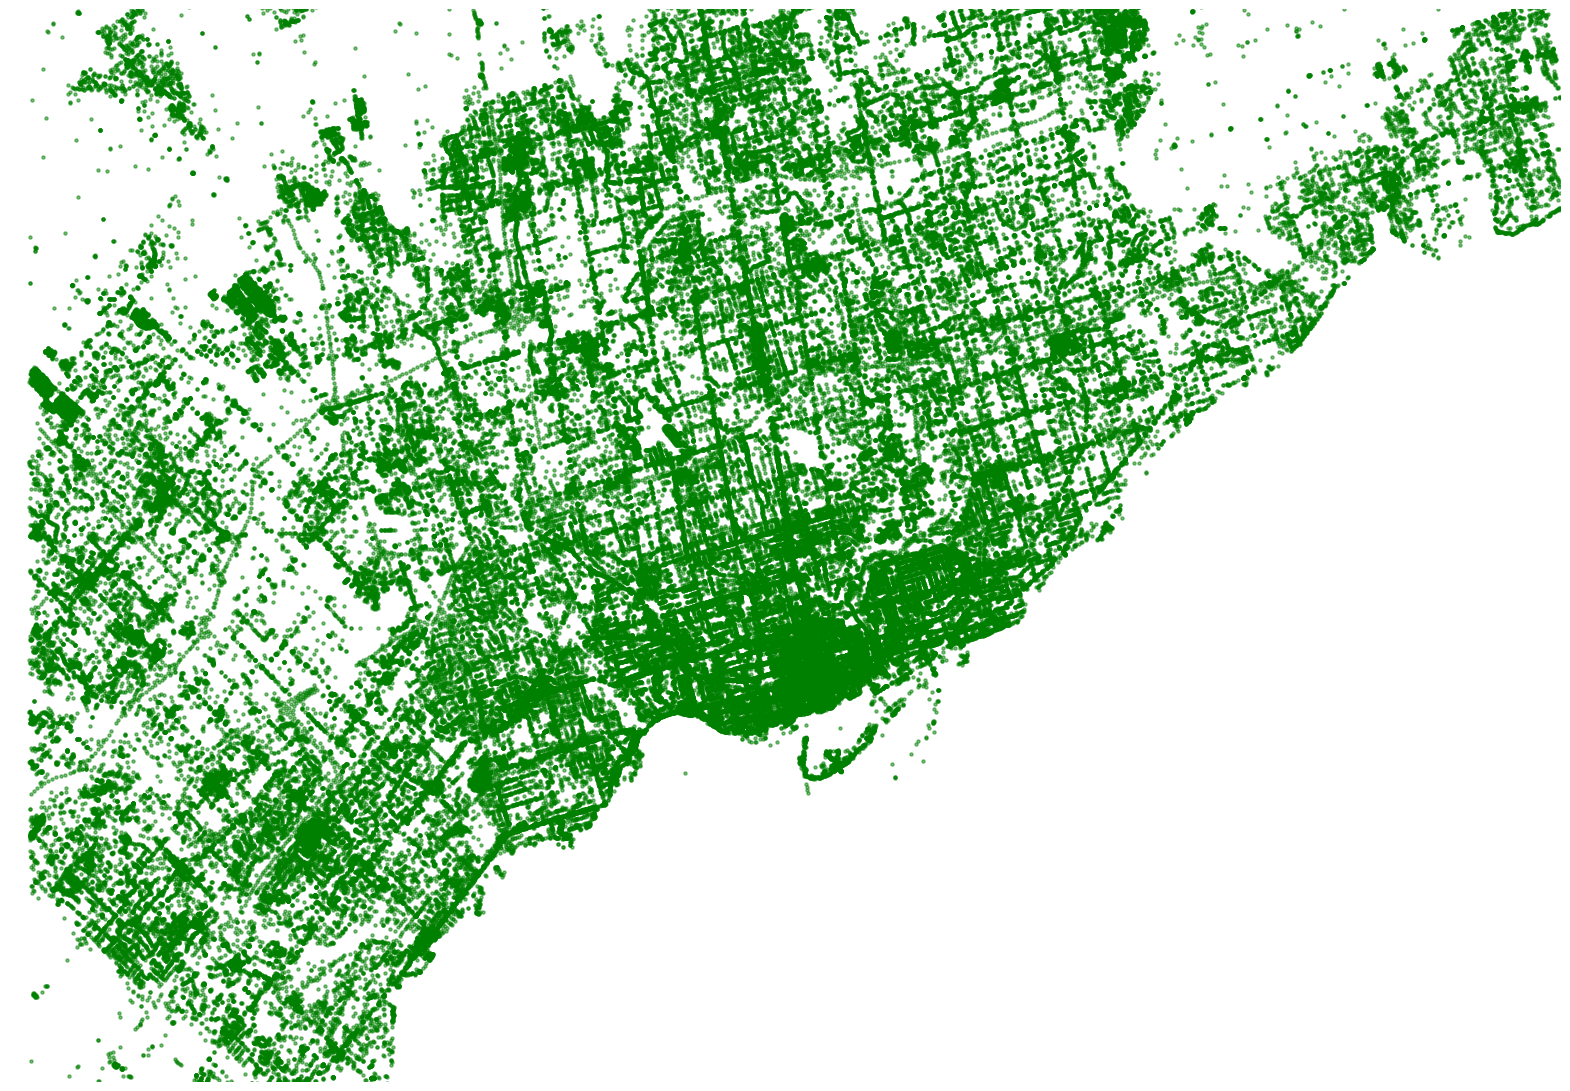

In [37]:
#modify plot
ax = toronto_points.plot(figsize=(20,20), color='green',markersize=5, alpha= 0.5)
ax.axis('off')
ax.set_xlim([-79.8,-79])
ax.set_ylim([43.5,43.9])